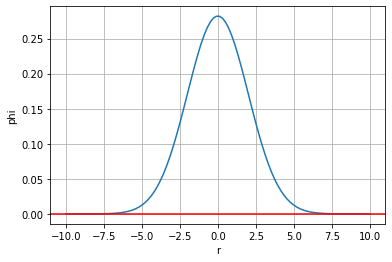

In [5]:
import numpy as np
import matplotlib.pyplot as plt
w=2
func = lambda r:np.exp(-r**2/(2*w**2))/(w*np.sqrt(np.pi))
r = np.linspace(-10,10,100)
plt.plot(r, func(r))
plt.axhline(0,color='Red')
plt.grid()
plt.xlabel('r')
plt.ylabel('phi')
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
def r(xx,yy):
    """Just for convenience, a function that returns r=sqrt(x^2+y^2)"""
    return np.sqrt(xx**2+yy**2)
def psi(r, w):
    """This Gaussian function should be normalised when integrated over an area"""
    return np.exp(-r**2/(2*w**2))/(w*np.sqrt(np.pi))
# We can define the x and y points for our grid
x = np.linspace(-10,10,201)
y = np.linspace(-10,10,201)
# This returns an array of the complete grid
xx, yy = np.meshgrid(x,y)
# We'll find |psi(r)|^2 at every point on the grid:
z = np.abs(psi(r(xx,yy),1))**2
z.sum()*((x[1]-x[0])*(y[1]-y[0]))


0.9999999999999928

In [21]:
def fmask(r, c):
    """Define a function that's 1 in a cricle and 0 outside of it"""
    return np.piecewise(r, [r <= c, r > c], [1, 0])
x = np.linspace(-10,10,201)
y = np.linspace(-10,10,201)
xx, yy = np.meshgrid(x,y)
# Now we can integrate over just the circle by setting everything outside of it to 0
z = psi(np.sqrt(xx**2+yy**2), 1)**2*fmask(xx**2+yy**2)
z.sum()*((x[1]-x[0])*(y[1]-y[0]))

0.6305321691656142

In [1]:
import numpy as np
from scipy.special import jv, kv
def fibre(R):
    U=1.5285
    W=1.2913
    N=1
    v=0
    A=jv(v,U)/kv(v,W)
    return np.piecewise(R, [R <= 1.0, R > 1.0],
                        [lambda R:N*(jv(v,U*R)) ,
                         lambda R:N*(A*kv(v,W*R))])
x = np.linspace(-10,10,201)
y = np.linspace(-10,10,201)
xx, yy = np.meshgrid(x,y)
z = np.abs(fibre(r(xx,yy)))**2
pow(1/(z.sum()*((x[1]-x[0])*(y[1]-y[0]))),0.5)

NameError: name 'r' is not defined

In [36]:
2.3804896652928806/(z.sum()*((x[1]-x[0])*(y[1]-y[0])))

1.0

In [37]:
1/2.3804896652928806


0.4200816389080884

In [39]:
import numpy as np
from scipy.special import jv, kv
def fibre(R):
    U=1.5285
    W=1.2913
    N=0.6481370525653416
    v=0
    A=jv(v,U)/kv(v,W)
    return np.piecewise(R, [R <= 1.0, R > 1.0],
                        [lambda R:N*(jv(v,U*R)) ,
                         lambda R:N*(A*kv(v,W*R))])
x = np.linspace(-10,10,201)
y = np.linspace(-10,10,201)
xx, yy = np.meshgrid(x,y)
z = np.abs(fibre(r(xx,yy)))**2
z = psi(np.sqrt(xx**2+yy**2), 1)**2*fibre(xx**2+yy**2)
z.sum()*((x[1]-x[0])*(y[1]-y[0]))

0.39842435163066237

In [40]:
import numpy as np
from scipy.special import jv, kv
from scipy import optimize, integrate
def fibre(R,T):
    U=1.5285
    W=1.2913
    N=0.6481370525653416
    v=0
    A=jv(v,U)/kv(v,W)
    return np.piecewise(R, [R <= 1.0, R > 1.0],
                        [lambda R:N*(jv(v,U*R)) ,
                         lambda R:N*(A*kv(v,W*R))])
def psi(r,w,T):
    return np.exp(-r**2/(2*w**2))/(w*np.sqrt(np.pi))

def test(w):
    integrand=lambda R,T:fibre(R,T)*psi(R,w,T)*R
    intgrl, abserr= integrate.dblquad(integrand,0,2*np.pi,0,np.inf)
    minr=1-intgrl
    return minr
result=optimize.minimize(test,0.5)
print(str((1-result.fun)**2)+'with mode radius at'+str(result.x))

0.9916265920491507with mode radius at[0.88972018]


In [43]:
import numpy as np
from scipy.special import jv, kv
from scipy import optimize, integrate
def fibre(R,T):
    U=1.5285
    W=1.2913
    N=0.6481370525653416
    v=0
    A=jv(v,U)/kv(v,W)
    return np.piecewise(R, [R <= 1.0, R > 1.0],
                        [lambda R:N*(jv(v,U*R)) ,
                         lambda R:N*(A*kv(v,W*R))])
def psi(r,w,T):
    return np.exp(-r**2/(2*w**2))/(w*np.sqrt(np.pi))

def test(w):
    integrand=lambda R,T:fibre(R,T)*psi(R,w,T)*R
    intgrl, abserr= integrate.dblquad(integrand,0,2*np.pi,0,np.inf)
    minr=1-intgrl
    return minr
result=optimize.minimize(test,0.5)

In [44]:
0.99162*0.966

0.9579049199999999

In [40]:
#Q3
import numpy as np
from scipy.optimize import fsolve
from scipy import  integrate
rho=6e-6
NA=0.13
nco=1.5
L=20e-6
wl=633e-9
k=2*np.pi/wl
ncl=np.sqrt(nco**2-NA**2)
V=rho*2*np.pi/wl*pow((nco**2-ncl**2),0.5)
w=rho/np.sqrt(2*np.log(V))
N1=5.256347080479378e-05
def psi(r,w):
    return np.exp(-r**2/(2*w**2))/(w*np.sqrt(np.pi))
pow(1/(z.sum()*((x[1]-x[0])*(y[1]-y[0]))),0.5)
integrand=lambda x,y:N1**2*(np.exp(-(x**2+y**2)/(2*w**2))/(w*np.sqrt(np.pi)))*np.exp(-((x-(20e-6))**2+y**2)/(2*w**2))/(w*np.sqrt(np.pi))
ding=lambda x: np.sqrt(np.abs((36e-12)-(x-(20e-6))**2))
di=lambda x:-np.sqrt(np.abs((36e-12)-(x-(20e-6))**2))
intgrl, abserr= integrate.dblquad(integrand,(14e-6),(26e-6),di,ding)
C=k*(nco-ncl)*intgrl


In [42]:
C

2.7657186532766546e-24

In [43]:
func=lambda z:(np.sin(C*z))**2-0.5
Z=fsolve(func, 0.1)[0]

In [44]:
Z

5.0

In [36]:
import numpy as np
from scipy.optimize import fsolve
from scipy import  integrate
def r(x,y):
    return np.sqrt(xx**2+yy**2)
rho=6e-6
NA=0.13
nco=1.5
L=20e-6
wl=633e-9
k=2*np.pi/wl
ncl=np.sqrt(nco**2-NA**2)
V=rho*2*np.pi/wl*pow((nco**2-ncl**2),0.5)
w=rho/np.sqrt(2*np.log(V))
def psi(r,w):
    return np.exp(-r**2/(2*w**2))/(w*np.sqrt(np.pi))
x = np.linspace(-10,10,201)
y = np.linspace(-10,10,201)
xx, yy = np.meshgrid(x,y)
z = np.abs(psi(r(xx,yy),w))**2
pow(1/(z.sum()*((x[1]-x[0])*(y[1]-y[0]))),0.5)



5.256347080479378e-05

In [ ]:
import numpy as np
from sympy.abc import z
from sympy import Abs,Piecewise,sqrt, exp,pi,sin,cos,pprint, symbols,log
from sympy import I, oo, erfc,Symbol, solve ,Eq,erfcinv
from scipy import special
r=0.25 #m
L=6.5e6 #m
wl=1550e-9 #m
at=0.3e-3 #db/m
ata=0.2e-3 #db/m
F=5 #dB
c=3e8 
Pin=1 # mW
NA=symbols('NA')

OSNR=(special.erfcinv(2e-9))**2
print(OSNR)
Pindbm=10*np.log10(Pin)
print(Pindbm,'dBm')
NAdB=10 *(log(NA)/log(10))
G=at*L/NA+0.2
pprint(NAdB)
solve(Pindbm-NAdB-F-G+58-17.99,NA)
print(NA)

17.9868444946377
0.0 dBm
10⋅log(NA)
──────────
 log(10)  


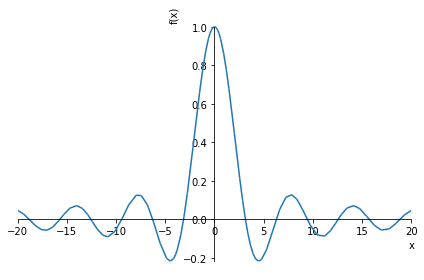

In [2]:
import numpy as np
from sympy.abc import z,x
from sympy import Abs,Piecewise,sqrt, exp,pi,sin,cos,pprint, symbols,log,sinc
from sympy import I, oo, erfc,Symbol, solve ,Eq,erfcinv
from scipy import special
from sympy.plotting import plot
plot(sinc(x),(x,-20,20))

In [ ]:
pl